In [1]:
%matplotlib inline

# Image-free segmentation vs. Image-dependent segmentation

In Bering model, image embeddings are learned from CNN models and used to capture cell boundary information from staining images, such as DAPI and membrane staining. Here we use the CosMx NSCLC data as an example to compare the performance of image-free and image-dependent segmentation.

### Import packages & data

In [2]:
import random
import numpy as np
import pandas as pd
import tifffile as tiff
import matplotlib.pyplot as plt 

import Bering as br

In [3]:
# load data
df_spots_all = br.datasets.cosmx_nsclc_he()
df_spots_seg = df_spots_all[df_spots_all['labels'] != 'background'] # foreground nodes
df_spots_unseg = df_spots_all[df_spots_all['labels'] == 'background'] # background nodes

img = tiff.imread('/data/aronow/Kang/spatial/Bering/demo/bm2_cosmx_nsclc/image.tif')
channels = ['Nuclei', 'PanCK', 'Membrane']

### image-free segmentation

Training node classifier:  98%|█████████▊| 49/50 [00:20<00:00,  2.97it/s]

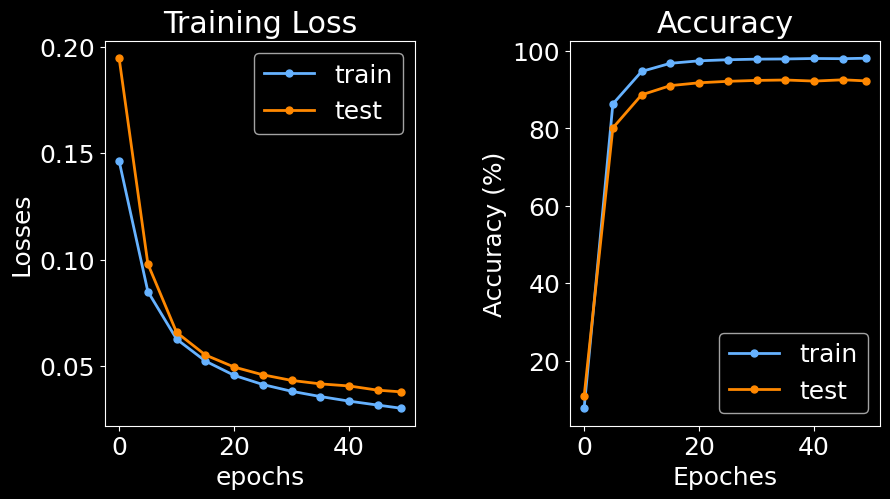

Training edge classifier:  98%|█████████▊| 49/50 [00:23<00:00,  2.09it/s]

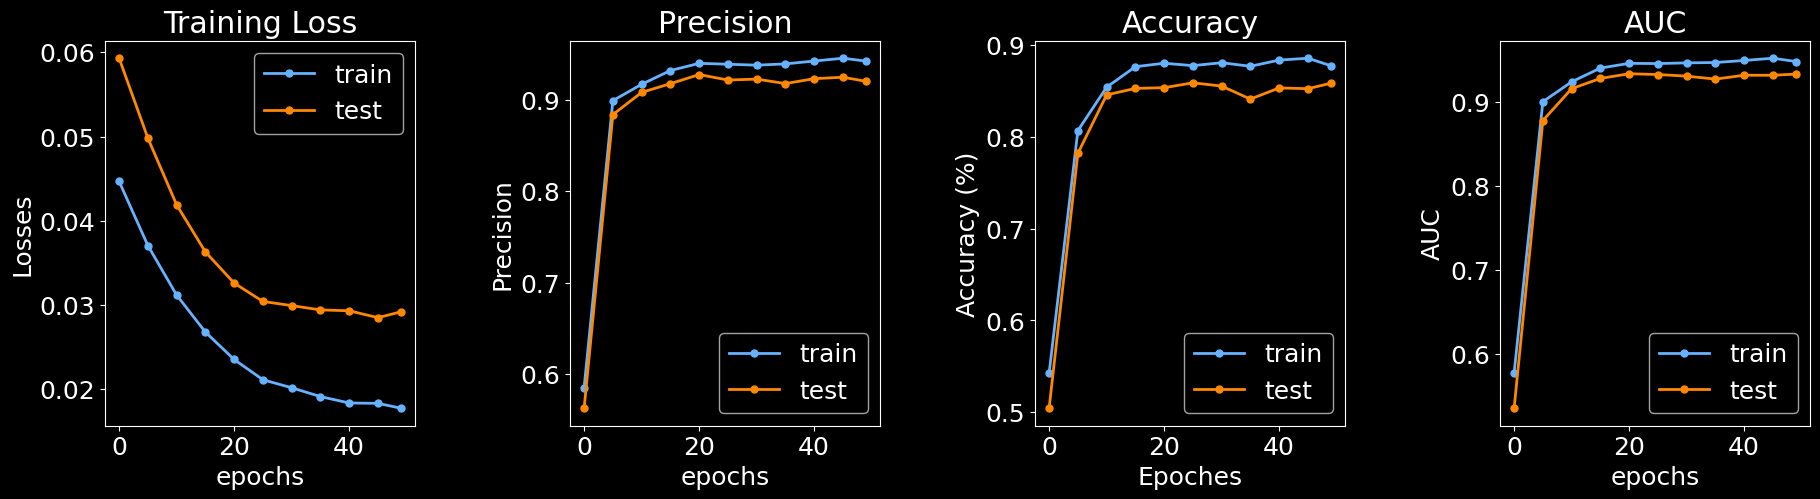

Training edge classifier: 100%|██████████| 50/50 [00:25<00:00,  1.97it/s]


In [4]:
bg = br.BrGraph(df_spots_seg, df_spots_unseg, image = None, channels = None)
br.graphs.BuildWindowGraphs(bg, n_cells_perClass = 4, window_width = 100.0, window_height = 100.0, n_neighbors = 10)
br.graphs.CreateData(bg, batch_size = 16, training_ratio = 0.8)
br.train.Training(bg)

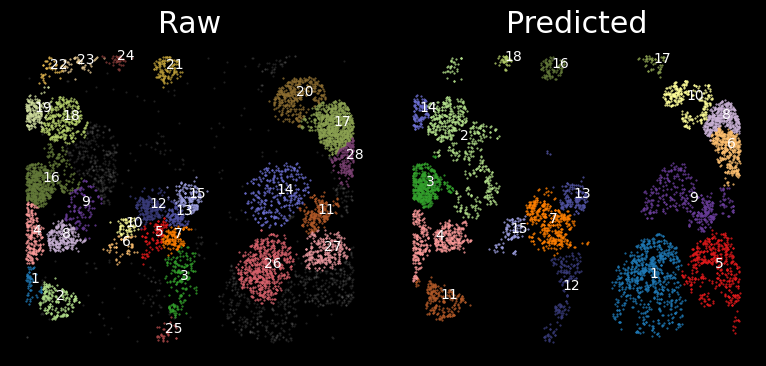

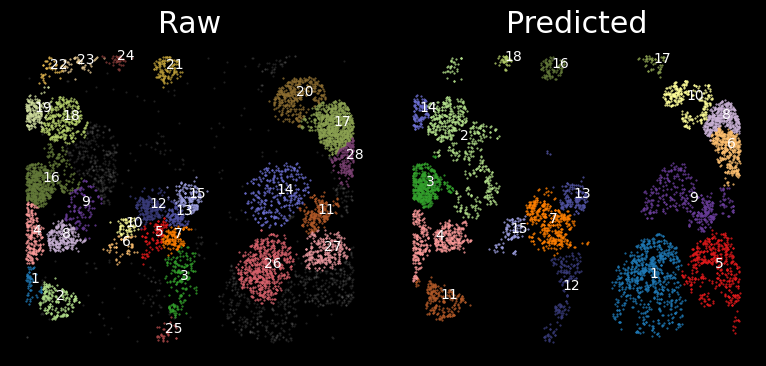

In [5]:
# plot cell segmentation
random_cell = cells = random.sample(bg.segmented.index.values.tolist(), 1)[0]
br.pl.Plot_Segmentation(
    bg, 
    cell_name = random_cell,
    n_neighbors = 10, 
    zoomout_scale = 4,
    use_image = True,
    pos_thresh = 0.6,
    resolution = 0.05,
    num_edges_perSpot = 100,
    min_prob_nodeclf = 0.3,
    n_iters = 20,
)

### image-dependent segmentation

Training node classifier:  98%|█████████▊| 49/50 [00:20<00:00,  2.88it/s]

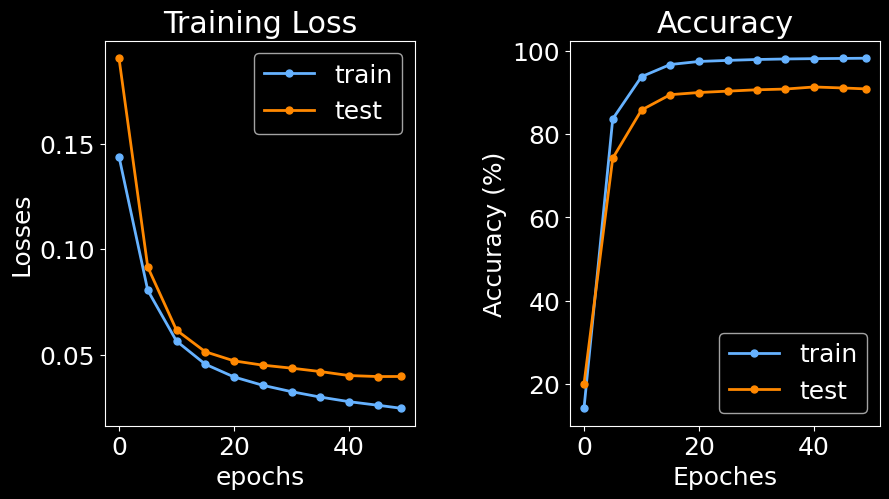

Training edge classifier:  98%|█████████▊| 49/50 [27:46<00:31, 31.75s/it]

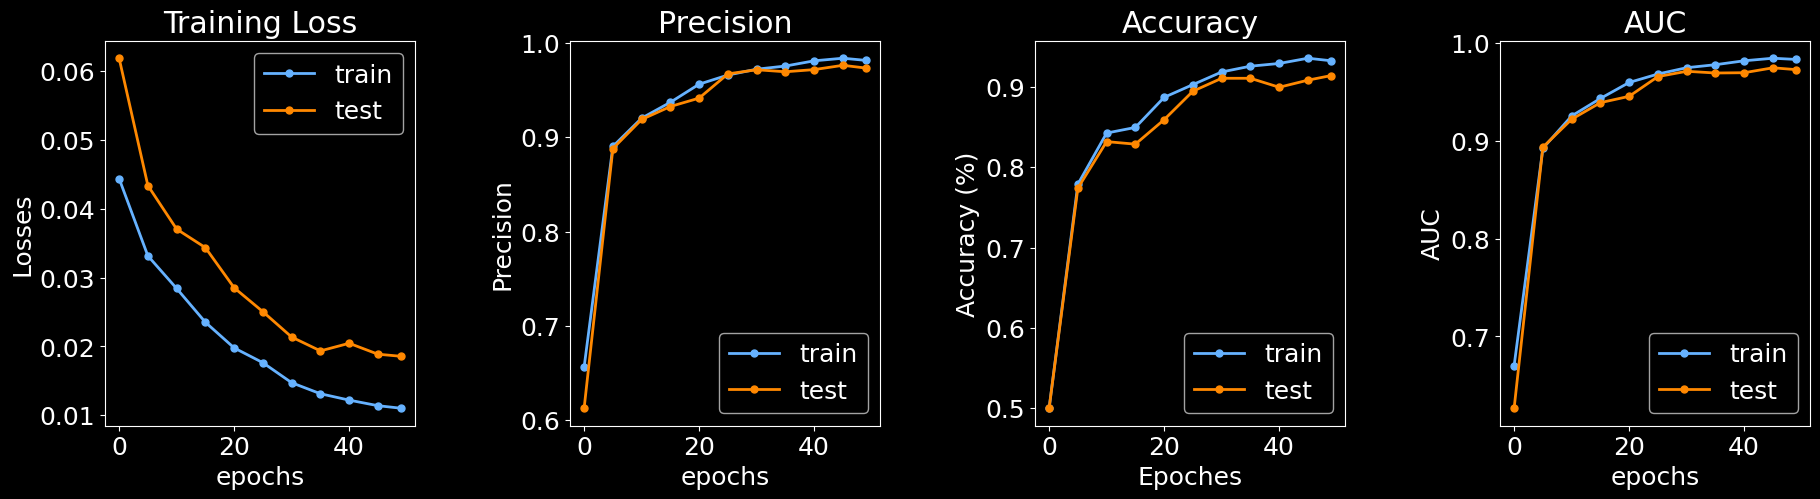

Training edge classifier: 100%|██████████| 50/50 [28:32<00:00, 34.24s/it]


In [6]:
bg = br.BrGraph(df_spots_seg, df_spots_unseg, image = img, channels = channels)
br.graphs.BuildWindowGraphs(bg, n_cells_perClass = 4, window_width = 100.0, window_height = 100.0, n_neighbors = 10)
br.graphs.CreateData(bg, batch_size = 16, training_ratio = 0.8)
br.train.Training(bg)

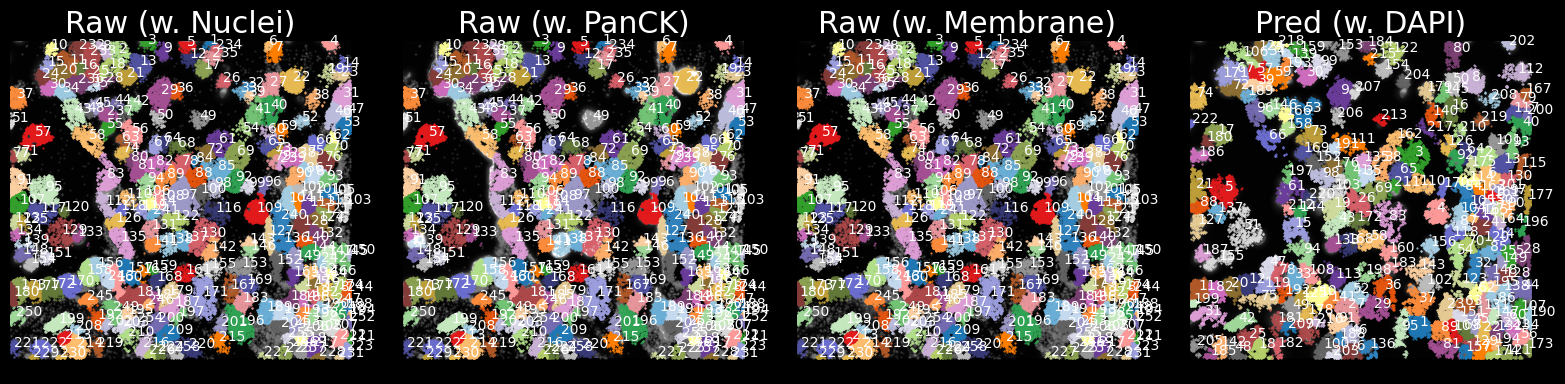

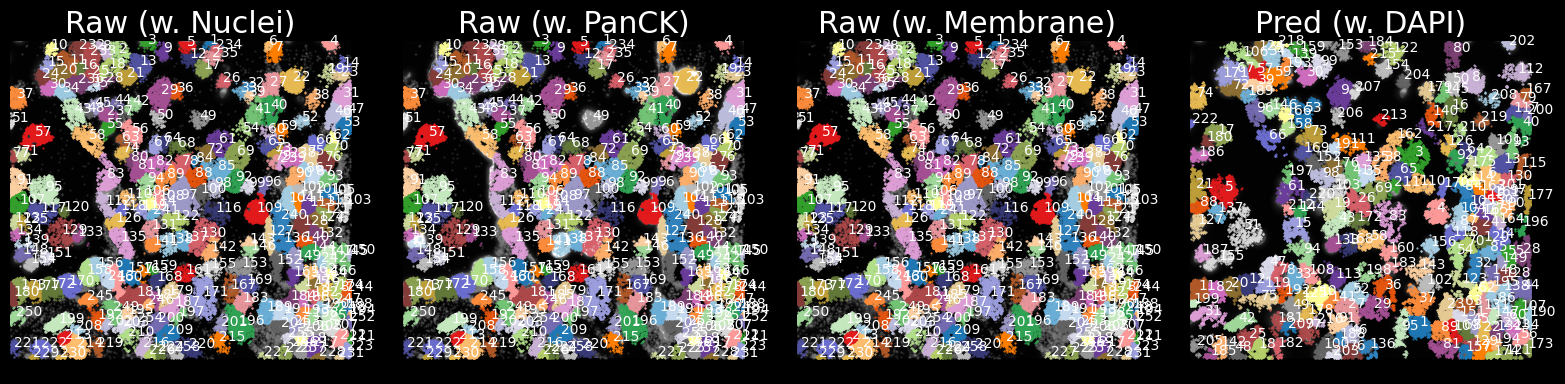

In [7]:
# plot cell segmentation
br.pl.Plot_Segmentation(
    bg, 
    cell_name = random_cell,
    n_neighbors = 10, 
    zoomout_scale = 4,
    use_image = True,
    pos_thresh = 0.6,
    resolution = 0.05,
    num_edges_perSpot = 100,
    min_prob_nodeclf = 0.3,
    n_iters = 20,
)